# BLG 307 - Yapay Zeka Sistemleri - Proje 1: Senaryo 5 - Kimya Tesisinde Reaksiyon Süresi ve Sıcaklık Ayarı

Eren Canruh 2312721045 https://github.com/ErenCnrh/genetik_optimizasyon

In [42]:
import random
import matplotlib.pyplot as plt
import numpy as np

# --- 1. PARAMETRELER VE SINIRLAR ---
POPULATION_SIZE = 100    # Popülasyon büyüklüğü
GENERATIONS = 50         # Jenerasyon (iterasyon) sayısı
MUTATION_RATE = 0.1      # Mutasyon olasılığı
CROSSOVER_RATE = 0.7     # Çaprazlama olasılığı

# Değişken Sınırları (Senaryo 5) [cite: 101, 103]
X1_BOUNDS = (10, 60)   # Reaksiyon süresi
X2_BOUNDS = (40, 120)  # Sıcaklık

# --- 2. AMAÇ VE UYGUNLUK (FITNESS) FONKSİYONU ---
def fitness_function(x1, x2):
    """
    Senaryo 5 formülü: y = 8x1 + 3x2 - x1*x2 + x1^2
    Kısıtlar sağlanmazsa 'ceza' uygulanır.
    """
    # Kısıt 1: x2 >= 60
    # Kısıt 2: x1 + x2 <= 140
    if (x2 < 60) or ((x1 + x2) > 140):
        return -99999  # Kısıt ihlali durumunda çok düşük puan (Ceza)

    # Kısıtlar sağlanıyorsa gerçek formülü hesapla
    y = 8*x1 + 3*x2 - (x1 * x2) + (x1**2)
    return y



In [43]:
# --- 3. GENETİK ALGORİTMA FONKSİYONLARI ---

def create_individual():
    """Rastgele genlere sahip bir birey oluşturur."""
    x1 = random.uniform(X1_BOUNDS[0], X1_BOUNDS[1])
    x2 = random.uniform(X2_BOUNDS[0], X2_BOUNDS[1])
    return [x1, x2]

def create_population(size):
    """Belirtilen sayıda bireyden oluşan popülasyon yaratır."""
    return [create_individual() for _ in range(size)]

def tournament_selection(population, scores, k=3):
    """Turnuva seçimi: Rastgele k birey seç, en iyisini al."""
    selection_ix = random.randint(0, len(population)-1)
    for ix in np.random.randint(0, len(population), k-1):
        if scores[ix] > scores[selection_ix]:
            selection_ix = ix
    return population[selection_ix]

def crossover(parent1, parent2):
    """Tek noktalı veya aritmetik çaprazlama."""
    if random.random() < CROSSOVER_RATE:
        alpha = 0.5
        # Çocuklar ebeveynlerin ortalaması veya karışımı olur
        child1 = [
            alpha * parent1[0] + (1-alpha) * parent2[0],
            alpha * parent1[1] + (1-alpha) * parent2[1]
        ]
        child2 = [
            (1-alpha) * parent1[0] + alpha * parent2[0],
            (1-alpha) * parent1[1] + alpha * parent2[1]
        ]
        return child1, child2
    return parent1, parent2

def mutate(individual):
    """Mutasyon: Gen değerlerinde küçük rastgele değişimler."""
    if random.random() < MUTATION_RATE:
        # Hangi genin mutasyona uğrayacağı rastgele seçilir veya ikisi de değişebilir
        gene_idx = random.randint(0, 1)
        if gene_idx == 0:
            individual[0] += random.uniform(-2, 2) # Küçük bir değişim ekle
            # Sınırları kontrol et
            individual[0] = max(X1_BOUNDS[0], min(individual[0], X1_BOUNDS[1]))
        else:
            individual[1] += random.uniform(-5, 5)
            individual[1] = max(X2_BOUNDS[0], min(individual[1], X2_BOUNDS[1]))
    return individual

# --- 4. ANA DÖNGÜ ---

def genetic_algorithm():
    # Başlangıç popülasyonu
    population = create_population(POPULATION_SIZE)

    best_fitness_history = []  # Grafik için en iyi skorları tut
    best_solution = None
    best_score = -float('inf')

    for gen in range(GENERATIONS):
        # Her bireyin uygunluk değerini hesapla
        scores = [fitness_function(ind[0], ind[1]) for ind in population]

        # En iyi çözümü takip et
        for i in range(POPULATION_SIZE):
            if scores[i] > best_score:
                best_score = scores[i]
                best_solution = population[i]

        best_fitness_history.append(best_score)

        # Yeni jenerasyon oluştur
        new_population = []
        for _ in range(0, POPULATION_SIZE, 2):
            # Seçilim
            parent1 = tournament_selection(population, scores)
            parent2 = tournament_selection(population, scores)

            # Çaprazlama
            child1, child2 = crossover(parent1, parent2)

            # Mutasyon
            child1 = mutate(child1)
            child2 = mutate(child2)

            new_population.extend([child1, child2])

        population = new_population
        print(f"Jenerasyon {gen+1}: En İyi Skor = {best_score:.4f}")

    return best_solution, best_score, best_fitness_history



Jenerasyon 1: En İyi Skor = 59.4747
Jenerasyon 2: En İyi Skor = 59.4747
Jenerasyon 3: En İyi Skor = 59.4747
Jenerasyon 4: En İyi Skor = 59.4747
Jenerasyon 5: En İyi Skor = 59.4747
Jenerasyon 6: En İyi Skor = 112.3710
Jenerasyon 7: En İyi Skor = 189.6257
Jenerasyon 8: En İyi Skor = 264.0797
Jenerasyon 9: En İyi Skor = 317.0808
Jenerasyon 10: En İyi Skor = 364.5242
Jenerasyon 11: En İyi Skor = 431.1471
Jenerasyon 12: En İyi Skor = 441.6159
Jenerasyon 13: En İyi Skor = 441.6159
Jenerasyon 14: En İyi Skor = 441.6159
Jenerasyon 15: En İyi Skor = 522.9862
Jenerasyon 16: En İyi Skor = 534.9269
Jenerasyon 17: En İyi Skor = 625.0331
Jenerasyon 18: En İyi Skor = 625.0331
Jenerasyon 19: En İyi Skor = 625.0331
Jenerasyon 20: En İyi Skor = 625.0331
Jenerasyon 21: En İyi Skor = 652.2707
Jenerasyon 22: En İyi Skor = 653.0404
Jenerasyon 23: En İyi Skor = 653.0404
Jenerasyon 24: En İyi Skor = 653.0404
Jenerasyon 25: En İyi Skor = 653.0404
Jenerasyon 26: En İyi Skor = 653.0404
Jenerasyon 27: En İyi Skor

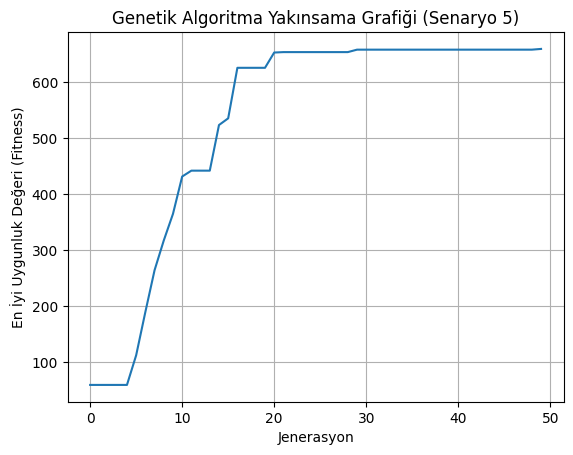

In [44]:
# --- 5. SONUÇLARI GÖRSELLEŞTİRME VE RAPORLAMA ---

if __name__ == "__main__":
    best_sol, best_val, history = genetic_algorithm()

    print("\n--- OPTİMİZASYON SONUCU (Senaryo 5) ---")
    print(f"En İyi x1 (Süre): {best_sol[0]:.2f} dk")
    print(f"En İyi x2 (Sıcaklık): {best_sol[1]:.2f} C")
    print(f"Maksimum Verim (y): {best_val:.4f}")

    # Kısıt kontrolü (Doğrulama)
    print(f"Kısıt Kontrolü (x1+x2 <= 140): {best_sol[0] + best_sol[1]:.2f} <= 140")
    print(f"Kısıt Kontrolü (x2 >= 60): {best_sol[1]:.2f} >= 60")

    # Grafik Çizimi
    plt.plot(history)
    plt.title('Genetik Algoritma Yakınsama Grafiği (Senaryo 5)')
    plt.xlabel('Jenerasyon')
    plt.ylabel('En İyi Uygunluk Değeri (Fitness)')
    plt.grid(True)
    plt.show()